# Titanic Survival Predication Model

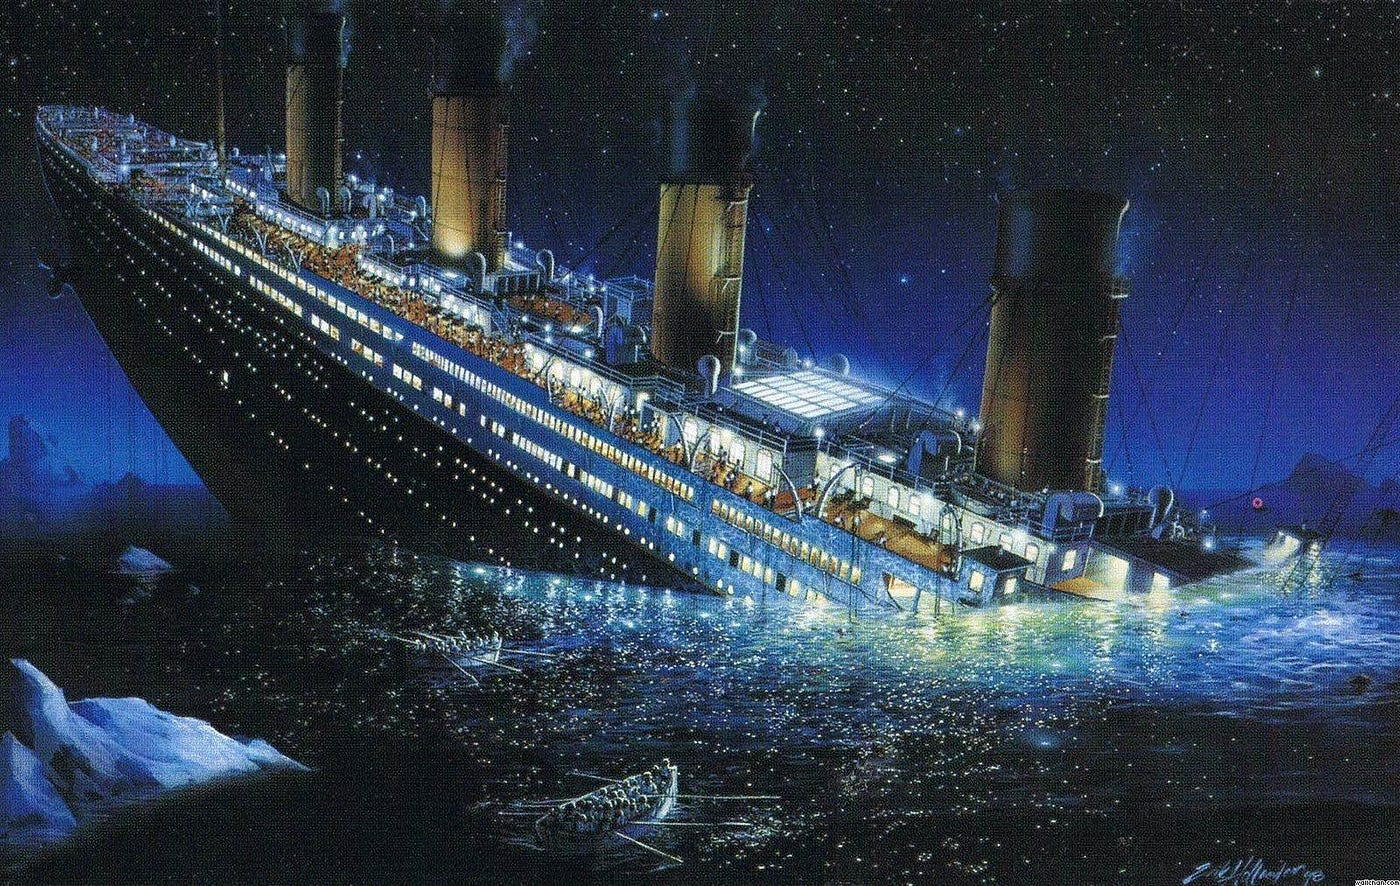

# Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Let's read the dataset

In [ ]:
titanic_data = pd.read_csv('train.csv')

# Let's have a look on our dataset

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Let's see how many rows and columns in our dataset

In [ ]:
titanic_data.shape

(891, 12)

# Let's see what are the different columns in our dataset

In [ ]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#1. EDA (Exploratory Data Analysis)

# visualize the distribution of ages from a dataset

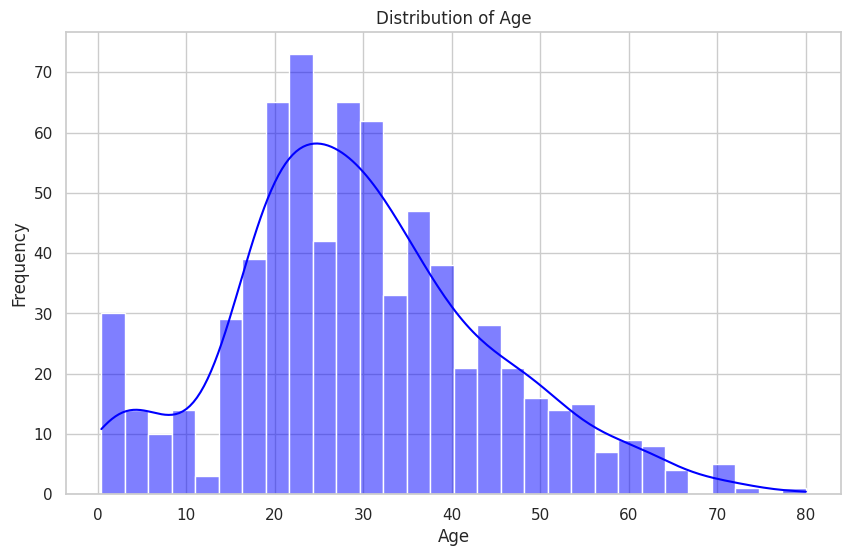

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Relationship between age and fare from the dataset

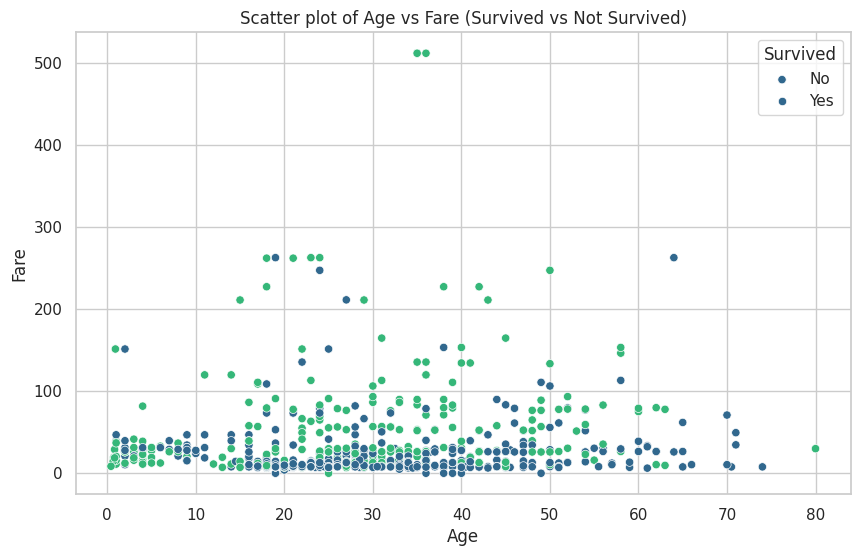

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=titanic_data, hue='Survived', palette='viridis')
plt.title('Scatter plot of Age vs Fare (Survived vs Not Survived)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

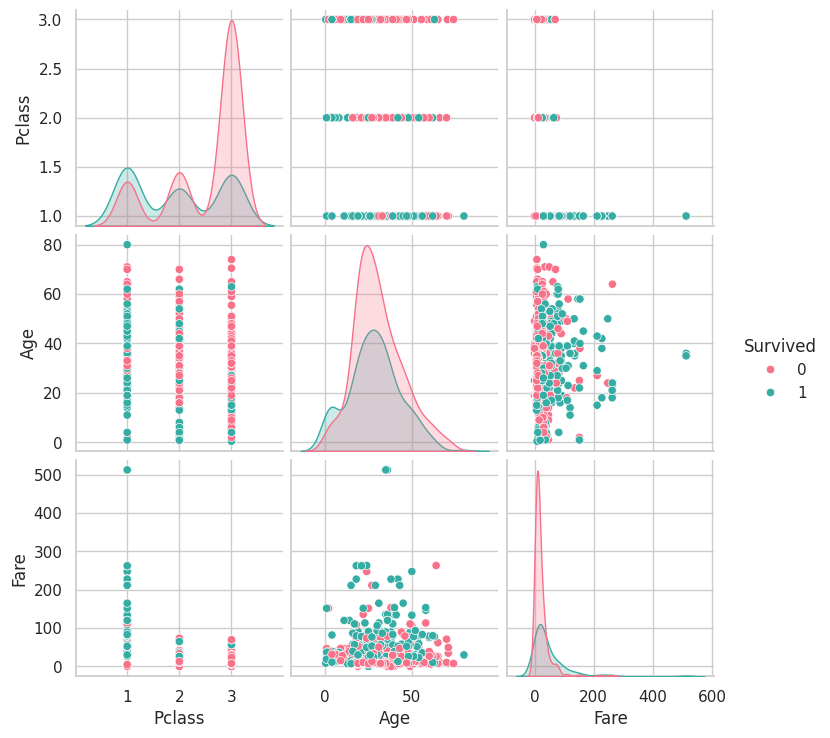

In [ ]:
sns.pairplot(titanic_data[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived', palette='husl')
plt.show()

# Number of survivors by Gender wise

<Axes: xlabel='Sex', ylabel='count'>

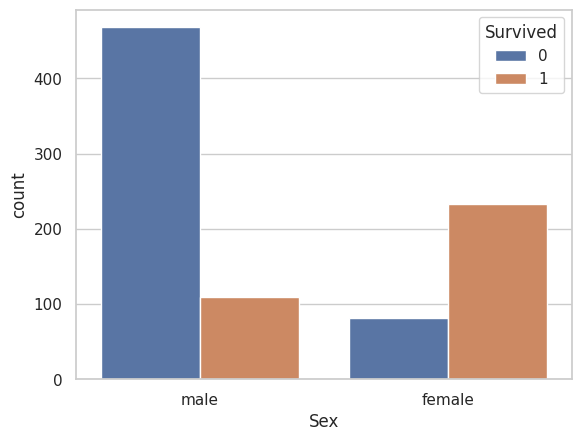

In [ ]:
sns.countplot(x="Sex", hue="Survived", data=titanic_data)

# Creating a Count plot for Pclass Column

<Axes: xlabel='Pclass', ylabel='count'>

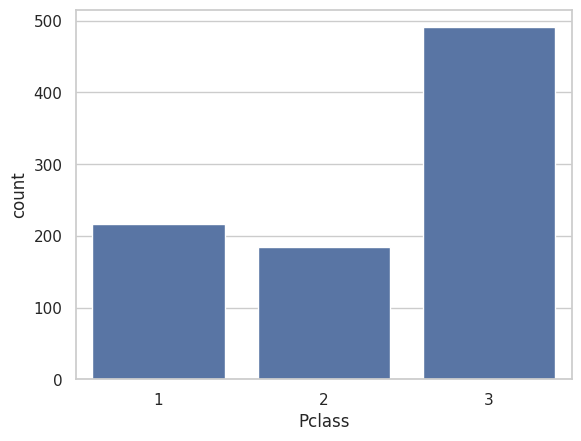

In [ ]:
sns.countplot(x="Pclass", data=titanic_data)

# Number of Survivers by Pclass wise

<Axes: xlabel='Pclass', ylabel='count'>

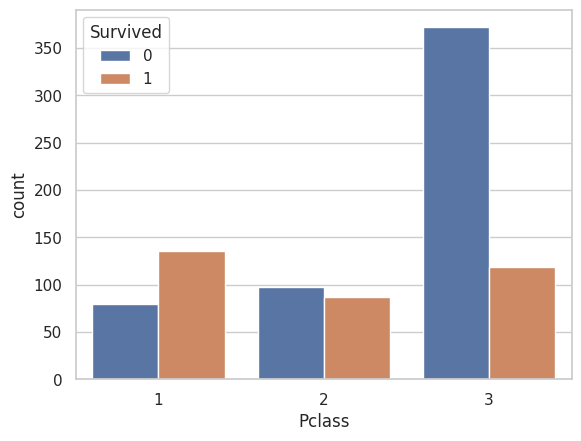

In [ ]:
sns.countplot(x="Pclass", hue="Survived", data=titanic_data)

#2. Data Preprocessing

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Check Missing Value in dataset

In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#  Dropping the "Cabin" column from the dataframe

In [ ]:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

# replacing missing values with mean number

In [ ]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

#lets fix Embarked Columns

In [ ]:

print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


# Finding the mode value of "Embarkked" Column

In [ ]:
print(titanic_data['Embarked'].mode()[0])

S


#replace the mode value with the missing value

In [ ]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [ ]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Getting statistical measures about the data (It's not useful while handling categorical column)

In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# how many survived?

In [ ]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# visualizing data

In [ ]:
sns.set()

In [ ]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

# Encode categorical columns/data

In [ ]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [ ]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

## split your dataset into feature variables (X) and target variable (Y). It drops the columns "PassengerId", "Name", "Ticket", and "Survived" from X, while Y retains only the "Survived" column.

In [ ]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [ ]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


#3. Model Building

# Split the data into test data and train data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


# Logistical regression and model training

In [ ]:
model = LogisticRegression()

# use the train data on logisticregression model

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluating and testing the model

In [ ]:
X_train_prediction = model.predict(X_train)

In [ ]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [ ]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8075842696629213


#check accuracy of test data

In [ ]:
X_test_prediction = model.predict(X_test)

In [ ]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [ ]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data:', test_data_accuracy)

Accuracy score of test data: 0.7821229050279329


#4. Model Deploy

In [ ]:
#ends...but
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [50]:
!pip install pyngrok

import subprocess
import os
from pyngrok import ngrok
#setup ngrok with authtoken

ngrok.set_auth_token("2eVjHYsRZW4anqQw6zbw3QlNhUf_44dUaVbhR6DhUepvu4qG7") #Enter your auth token here

#running flask app
os.system("nohup python -m flask run --no-reload &")

#opening ngrok tunnel to the flask app uding http protocol
proc = subprocess.Popen(["ngrok", "http", "5000"])

#Retrive ngrok's public url here
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://daf6-34-106-236-191.ngrok-free.app" -> "http://localhost:5000"


In [51]:
from flask import Flask, request, jsonify
import joblib
from pyngrok import ngrok
from IPython.display import display, HTML

# Load the trained model
model = joblib.load('logistic_regression_model.pkl')

app = Flask(__name__)

@app.route('/')
def home():
    # HTML form to take inputs
    html_form = """
    <!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Titanic Survival Prediction</title>

    <style>
        *{
            padding: 0;
            margin: 0;
            font-family: sans-serif;
            box-sizing: border-box;
        }
        body {
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            background-image: linear-gradient(#380036, #0CBABA);
        }
        .Container {
            max-width: 650px;
            padding: 28px;
            margin: 0 28px;
            border-radius: 10px;
            overflow: hidden;
            background: rgba(0, 0, 0, 0.2);
            box-shadow: 0 15px 20px rgba(0, 0, 0, 0.6);
        }
        h2{
            font-size: 26px;
            font-weight: bold;
            text-align: left;
            color: #fff;
            padding-bottom: 8px;
            border-bottom: 1px solid silver;
        }
        .content{
            display: flex;
            flex-wrap: wrap;
            justify-content: space-between;
            padding: 20px 0;
        }
        .input-box{
            display: flex;
            flex-wrap: wrap;
            width: 50%;
            padding-bottom: 15px;
        }

        .input-box:nth-child(2n){
            justify-content: end;
        }
        .input-box label {
            width: 95%;
            color: #fff;
            font-weight: bold;
            margin: 5px 0;
        }

        .input-box input{
            height: 40px;
            width: 95%;
            padding: 0 10px;
            border-radius: 5px;
            border: 1px solid #ccc;
            outline: none;
        }
        .input-box input:is(:focus,:valid){
            box-shadow: 0 3px 6px rgba(0, 0, 0, 0.2);
        }
        .button-container{
            margin: 15px 0;
        }
        .button-container button{
            width: 100%;
            margin-top: 10px;
            padding: 10px;
            display: block;
            font-size: 20px;
            color: #fff;
            border: none;
            border-radius: 5px;
            background-image: linear-gradient(to right, #aa076b, #61045f);
            cursor: pointer;
            transition: 0.3s;
        }
        .button-container button:hover{
            background-image: linear-gradient(to right,#61045f, #aa076b);
        }
        .alert p {
            font-size: 20px;
            font-style: italic;
            color:#fff;
            margin: 5px 0;
            padding: 10px;
            line-height: 1.5;
        }
        .alert p1{
            font-size: 20px;
            font-style: italic;
            color: black;
            margin: 5px 0;
            padding: 10px;
            line-height: 1.5;
        }
        @media(max-width:600px){
            .Container{
                min-width: 280px;
            }
            .content{
                max-height: 380px;
                overflow: auto;
            }
            .input-box{
                margin-bottom: 12px;
                width: 100%;
            }
            .input-box:nth-child(2n){
                justify-content: space-between;
            }
            .content::webkit-scrollbar{
                width: 0;
            }

        }

    </style>
</head>
<body>
    <div class="Container">
        <form id="predictionForm" method="post" action="/predict">
            <h2>Titanic Survival Prediction</h2>
            <div class="content">
                <div class="input-box">
                    <label for="pclass">Enter The Passenger Class:</label>
                    <input type="text" id="pclass" name="pclass" placeholder="Enter Pclass" required><br><br>
                </div>

                <div class="input-box">
                    <label for="sex">Gender (0 for male, 1 for female):</label>
                    <input type="text" id="sex" name="sex" placeholder="Enter Gender" required><br><br>
                </div>

                <div class="input-box">
                    <label for="age">Enter Age in years:</label>
                    <input type="text" id="age" name="age" placeholder="Enter Age" required><br><br>
                </div>

                <div class="input-box">
                    <label for="sibsp">Enter The Siblings/Spouses</label>
                    <input type="text" id="sibsp" name="sibsp" placeholder="Enter sibsp" required><br><br>
                </div>

                <div class="input-box">
                    <label for="parch">Enter The Parents/Children</label>
                    <input type="text" id="parch" name="parch" placeholder="Enter Parch" required><br><br>
                </div>

                <div class="input-box">
                    <label for="fare">Enter The fare charged:</label>
                    <input type="text" id="fare" name="fare" placeholder="Enter fare charged" required><br><br>
                </div>

                <div class="input-box">
                    <label for="embarked">Embarked (0 for S, 1 for C, 2 for Q):</label>
                    <input type="text" id="embarked" name="embarked" placeholder="Enter Embarked" required><br><br>
                </div>
            </div>
            <div class="alert">
                <p1>Survival Prediction:(0 for Not Survived, 1 for Survived)</p1>
                <p id="predictionResult"></p>
            </div>

            <div class="button-container">
                <button type="button" onclick="predictSurvival()">Predict</button>
            </div>
        </form>
    </div>
    <script>
        function predictSurvival() {
            var xhr = new XMLHttpRequest();
            var url = "/predict";
            var data = new FormData(document.getElementById("predictionForm")); // Changed to FormData

            xhr.open("POST", url, true);
            xhr.onreadystatechange = function () {
                if (xhr.readyState === 4 && xhr.status === 200) {
                    var response = JSON.parse(xhr.responseText);
                    document.getElementById("predictionResult").innerHTML = "Survival Prediction: " + response.prediction;
                }
            };
            xhr.send(data);
        }
    </script>
</body>
</html>
    """
    return html_form

@app.route('/predict', methods=['POST'])
def predict():
    # Access form data
    pclass = request.form['pclass']
    sex = request.form['sex']
    age = request.form['age']
    sibsp = request.form['sibsp']
    parch = request.form['parch']
    fare = request.form['fare']
    embarked = request.form['embarked']

    # Convert data to appropriate types
    pclass = int(pclass)
    sex = int(sex)
    age = float(age)
    sibsp = int(sibsp)
    parch = int(parch)
    fare = float(fare)
    embarked = int(embarked)

    # Make prediction
    features = [[pclass, sex, age, sibsp, parch, fare, embarked]]
    prediction = model.predict(features)[0]

    return jsonify({'prediction': int(prediction)})

def run_flask_app():
    # Run Flask app on port 5000
    app.run(host='127.0.0.1', port=5000, debug=True, use_reloader=False)

# Start ngrok tunnel
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)

# Display ngrok tunnel URL
display(HTML(f"<h2>Open this link in your browser to access the application:</h2><p>{public_url}</p>"))

try:
    # Keep the Flask app running
    run_flask_app()
except KeyboardInterrupt:
    # Shutdown ngrok and Flask app
    ngrok.kill()


Public URL: NgrokTunnel: "https://0608-34-106-236-191.ngrok-free.app" -> "http://localhost:5000"


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
